In [1]:
# Añade la dirección del paquete a las direcciones importables
import sys
sys.path.append('../..')

In [2]:
import numpy as np

from qiskit_aer import AerSimulator
from qiskit.circuit.library import EfficientSU2

from qubap.qiskit.jorge.MPS import Ansatz
from qubap.qiskit.luciano.costfunc_barren_plateaus import test_hamiltonian_2, VQE_adiabatic
from qubap.qiskit.luciano.variational_algorithms import VQE

In [3]:
num_qubits = 8
num_shots  = 2**6
num_iters  = 200

In [4]:
backend = AerSimulator(shots=num_shots)

In [5]:
# Define the Hamiltonian to solve
H = test_hamiltonian_2(num_qubits)

In [6]:
# Circuit and guess
qc = EfficientSU2(num_qubits, ['ry','rz'], 'circular', 1)
guess = np.random.rand(qc.num_parameters) * np.pi

In [7]:
results_adiabatic = VQE_adiabatic(H, qc, guess, num_iters, backend, returns=['x', 'fx'])

In [8]:
results_naive = VQE(H, qc, guess, num_iters, backend, returns=['x', 'fx'])

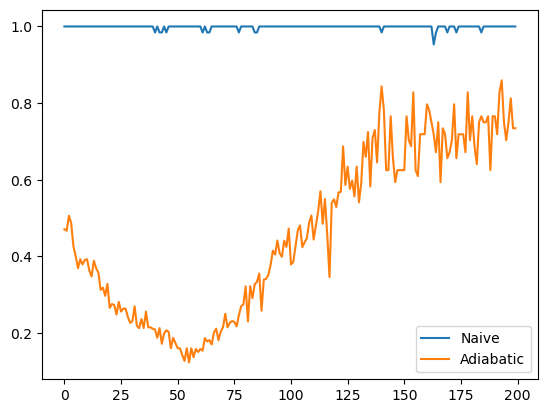

In [9]:
import matplotlib.pyplot as plt

plt.plot(results_naive['fx'], label='Naive')
plt.plot(results_adiabatic['fx'], label='Adiabatic')

plt.legend()